# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

C:\Users\Sean Xander Aquino\AppData\Local\Temp\ipykernel_19832\2610210227.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Preparing the Dataset

In [2]:
wine_quality = fetch_ucirepo(id=186)

# Extract data and targets
X = wine_quality.data.features
y = wine_quality.data.targets

print(wine_quality.metadata)
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'quality'}, inplace=True)
    

# Display dataset information and visualizations


In [4]:
def wine_data(df):
    print("Dataset Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())
    print("\nBasic Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

wine_data(df)

Dataset Shape: (6497, 12)

Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First few rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

 # Correlation Matrix


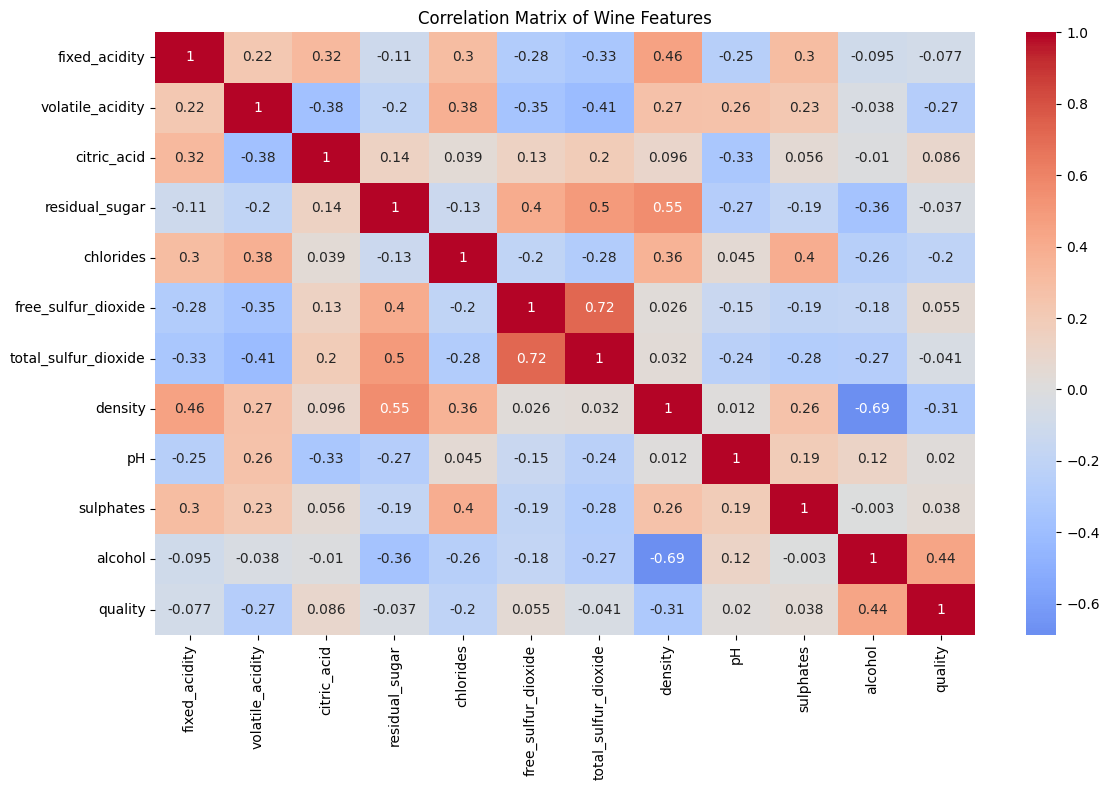

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

# Visualization of the distribution of features

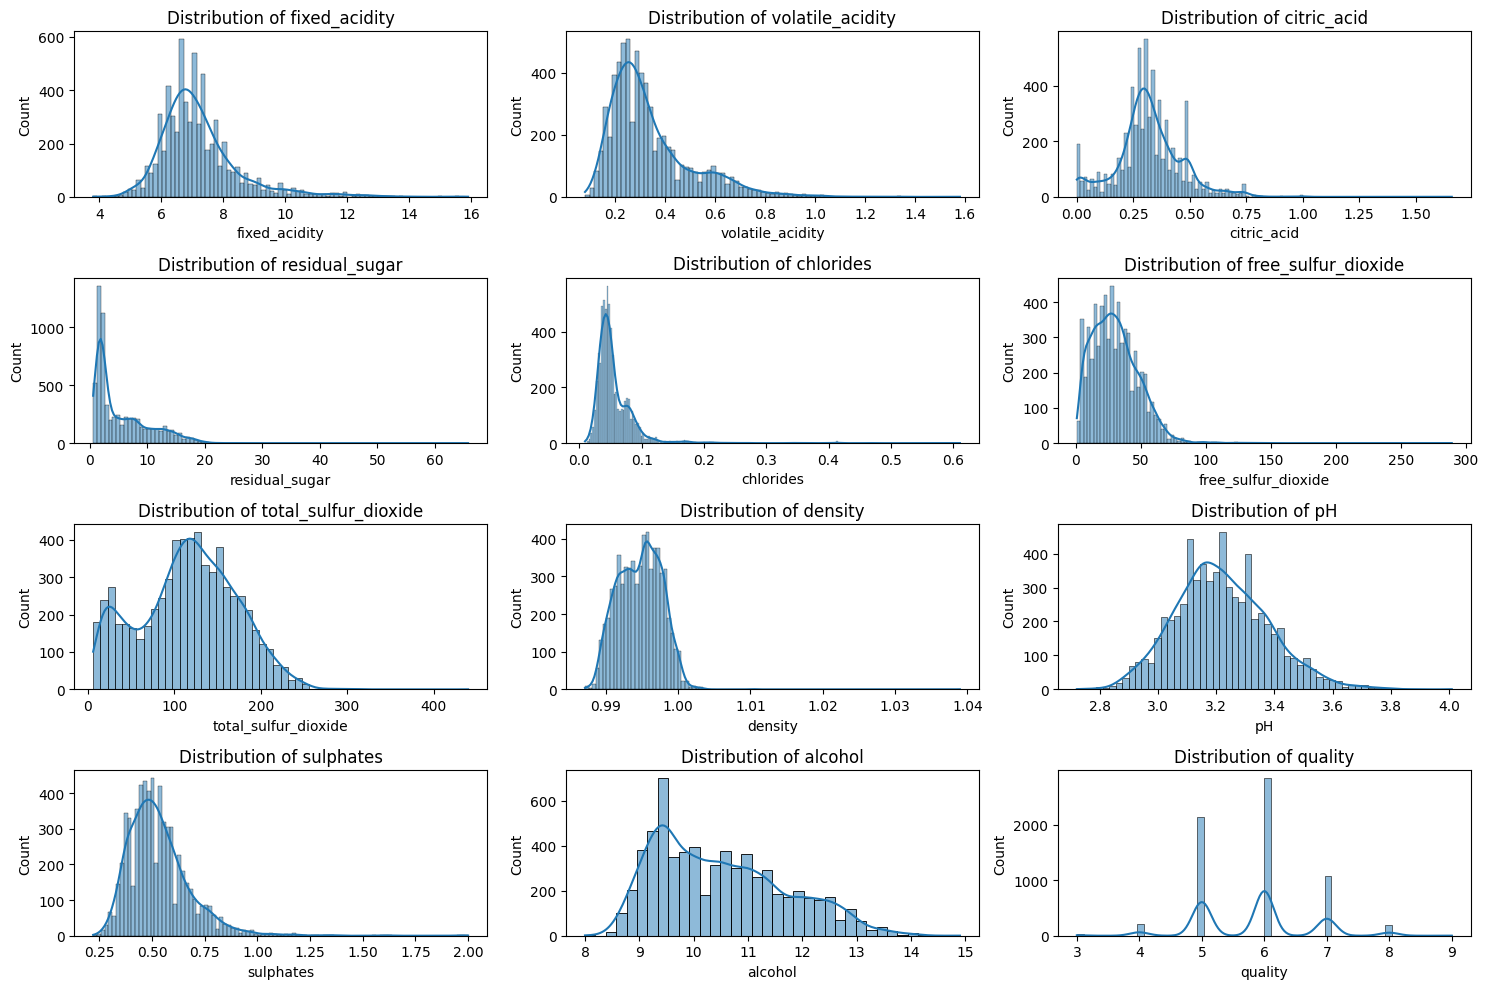

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [7]:
def linear_regression_analysis(df):
    X = df.drop('quality', axis=1)
    y = df['quality']

# Splitting data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5197, 11)
Test set shape: (1300, 11)


# Training the model


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predicting and evaluating

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Mean Squared Error on Test Data: 0.546696441959444


# Visualization of Training and Testing Sets

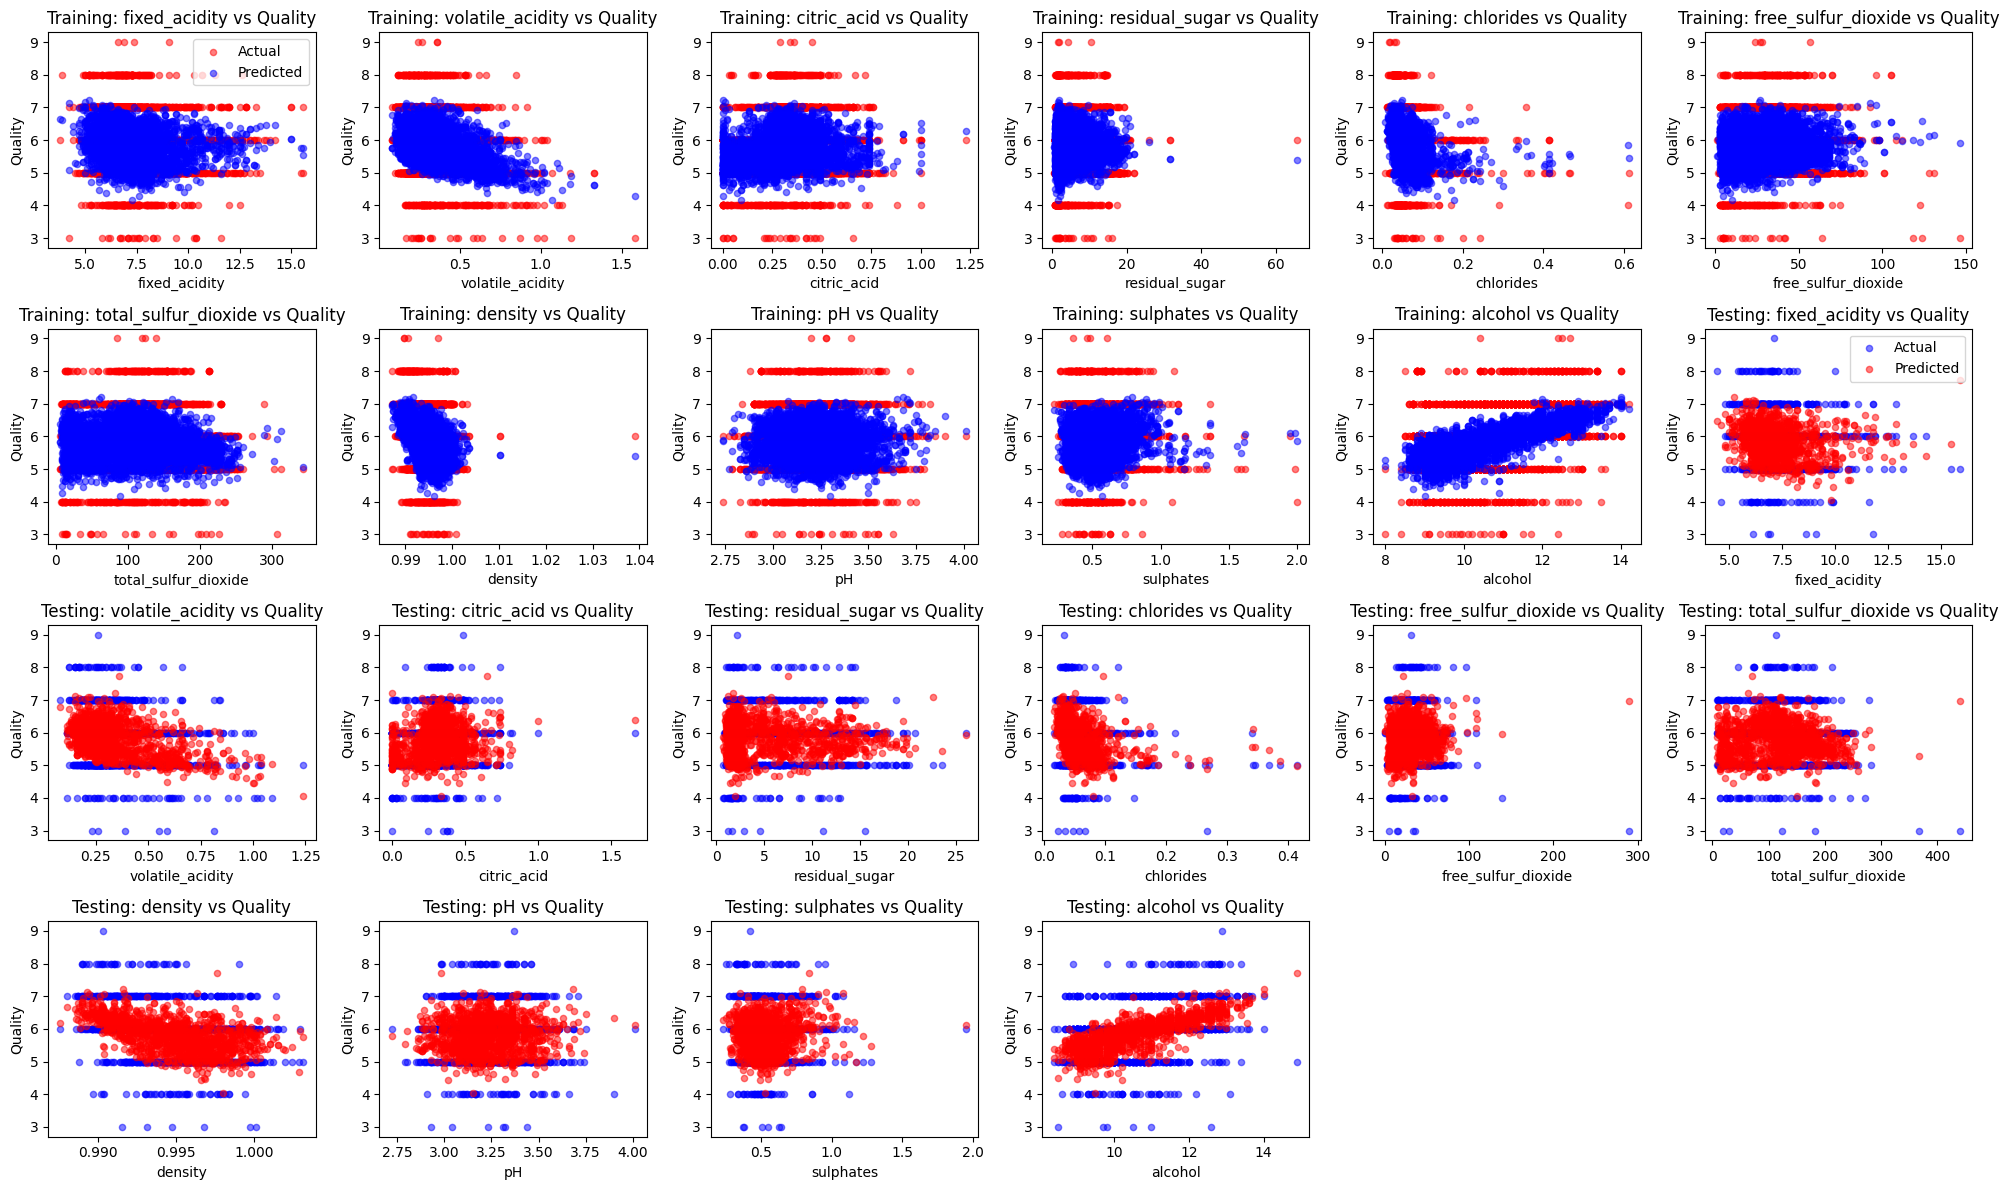

In [11]:
plt.figure(figsize=(20, 12))

# Training Set Visualizations
for i, feature in enumerate(X_train.columns, 1):
    plt.subplot(4, 6, i)
    plt.scatter(X_train[feature], y_train, color='red', alpha=0.5, s=20, label='Actual')
    plt.scatter(X_train[feature], y_train_pred, color='blue', alpha=0.5, s=20, label='Predicted')
    
    plt.title(f'Training: {feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    if i == 1: 
        plt.legend()

# Testing Set Visualizations
for i, feature in enumerate(X_test.columns, 1):
    plt.subplot(4, 6, i + len(X_test.columns))
    plt.scatter(X_test[feature], y_test, color='blue', alpha=0.5, s=20, label='Actual')
    plt.scatter(X_test[feature], y_test_pred, color='red', alpha=0.5, s=20, label='Predicted')
    
    plt.title(f'Testing: {feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()

In [12]:
print("\nModel Performance:")
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))


Model Performance:
Training Score: 0.2992523560502254
Testing Score: 0.2597673129771402


# Visualization between the Actual Quality and the Predicted Quality 

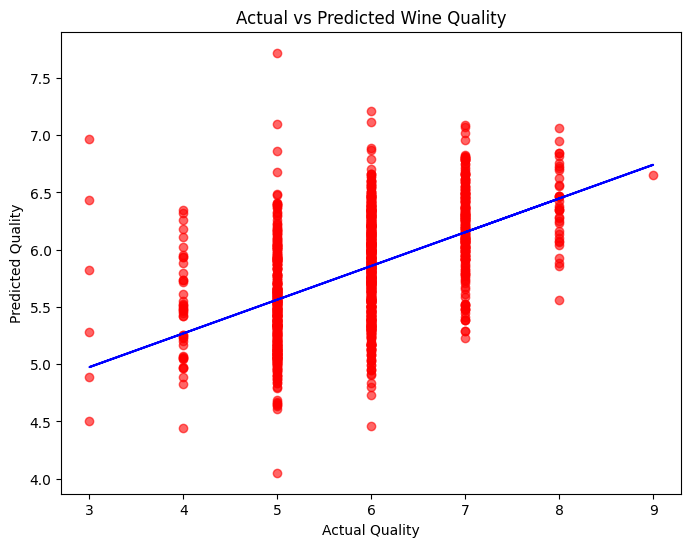

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='red')

y_test_array = np.array(y_test).reshape(-1)
y_pred_array = np.array(y_pred).reshape(-1)
z = np.polyfit(y_test_array, y_pred_array, 1)
p = np.poly1d(z)
plt.plot(y_test_array, p(y_test_array), color='blue')

plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.show()

# Visualization of Model Performance of Training Set and Testing Set

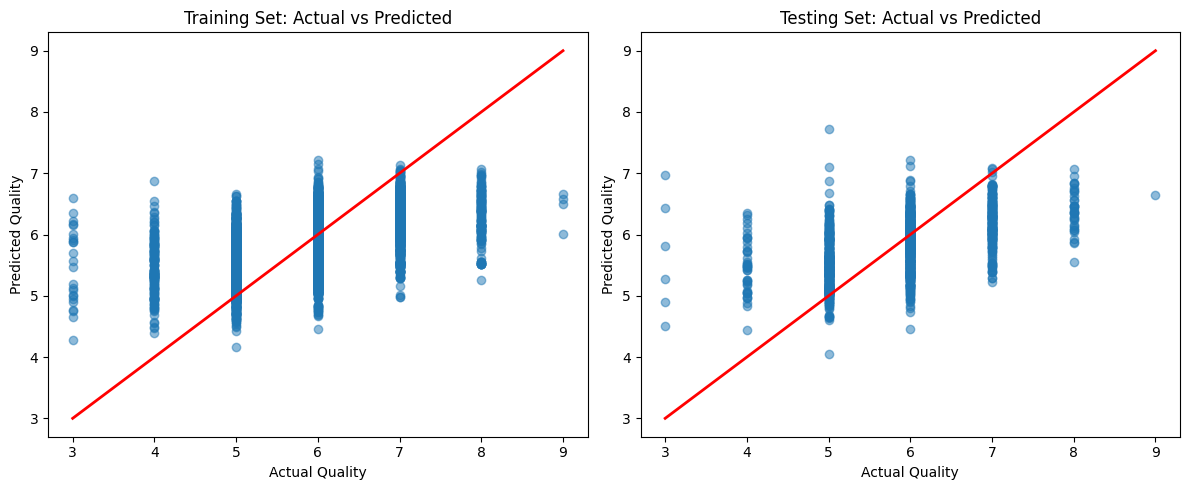

In [14]:
plt.figure(figsize=(12, 5))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'red', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Training Set: Actual vs Predicted')

# Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Testing Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

In [15]:
linear_regression_analysis(df)